# Entropy and MPSlib
The self-information, and entropy (the average self-information), acan be commputed using MPSlib by setting

    do_entropy=1
    
See details in 

[Hansen, Thomas Mejer. "Entropy and information content of geostatistical models." Mathematical Geosciences 53.1 (2021): 163-184](https://doi.org/10.1007/s11004-020-09876-z)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mpslib as mps


### Setup MPSLib
Setup MPSlib, and select to compute entropy using for example

In [2]:
# Initialize MPSlib using the mps_snesim_tree algorthm, and a simulation grid of size [80,70,1]
O = mps.mpslib(method='mps_snesim_tree', simulation_grid_size=[80,70,1])
O.delete_local_files()
O.par['n_real'] = 200
O.par['n_cond']= 9
# Choose to compute entropy
O.par['do_entropy']=1
TI, TI_filename = mps.trainingimages.strebelle(di=4, coarse3d=1)
O.ti = TI

O_all = O.run_parallel()
#O_all = O.run()


/mnt/f/PROGRAMMING/mpslib/scikit-mps/mpslib
Using mps_snesim_tree installed in /mnt/f/PROGRAMMING/mpslib/scikit-mps/mpslib/bin (scikit-mps in /mnt/f/PROGRAMMING/mpslib/scikit-mps/mpslib/mpslib.py)
Beginning download of https://github.com/GAIA-UNIL/trainingimages/raw/master/MPS_book_data/Part2/ti_strebelle.sgems to ti_strebelle.dat
parallel: using 10 threads to simulate 200 realizations
parallel: with up to 20 relizations per thread
parallel: Using 10 of max 10 threads
__name__ = mpslib.mpslib
Thread:000, nr=20Thread:001, nr=20

Thread:002, nr=20Thread:003, nr=20

Thread:004, nr=20
Thread:005, nr=20
Thread:006, nr=20Thread:008, nr=20Thread:007, nr=20

Thread:009, nr=20

mpslib: trying to run 'mps_snesim_tree' on 'mps_snesim_tree_000.txt' in folder '/mnt/f/PROGRAMMING/mpslib/scikit-mps/mpslib/bin/mps_snesim_tree'
mpslib: trying to run 'mps_snesim_tree' on 'mps_snesim_tree_002.txt' in folder '/mnt/f/PROGRAMMING/mpslib/scikit-mps/mpslib/bin/mps_snesim_tree'
mpslib: trying to run 'mps_snesi

## Plot entropy

Text(0.5, 1.0, 'Entropy as a function of number of realizations')

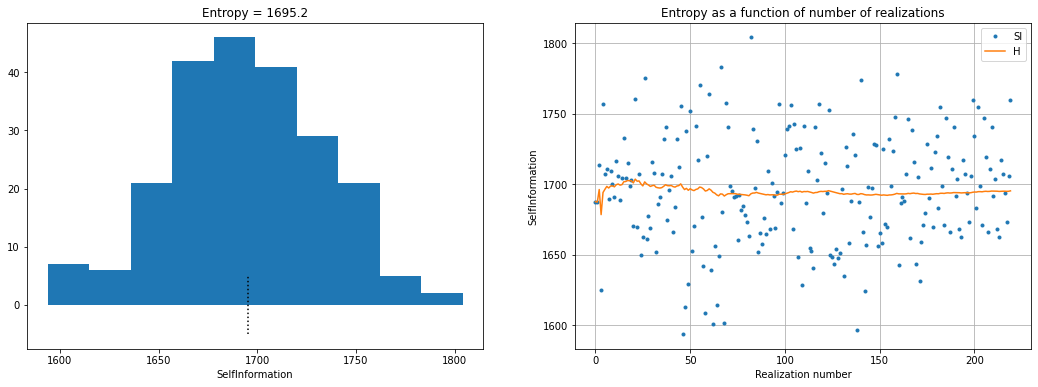

In [3]:
fig = plt.figure(figsize=(18, 6))

plt.subplot(1,2,1)
plt.hist(O.SI)
plt.plot(np.array([1, 1])*O.H,[-5,5],'k:')
plt.xlabel('SelfInformation')
plt.title('Entropy = %3.1f' % (O.H))

plt.subplot(1,2,2)
plt.plot(O.SI,'.', label='SI')

plt.plot(np.cumsum(O.SI)/(np.arange(1,1+len(O.SI))),'-',label='H')
plt.legend()
plt.grid()

plt.xlabel('Realization number')
plt.ylabel('SelfInformation')
plt.title('Entropy as a function of number of realizations' % (O.H))

## Entropy as a function of number of conditional data

In [4]:
TI, TI_filename = mps.trainingimages.strebelle(di=4, coarse3d=1)

n_cond_arr = np.array([1,2,4,6,8,12,16,24,32,64])

H=np.zeros(n_cond_arr.size) # entropy
t=np.zeros(n_cond_arr.size) # simulation time
i=0                      
SI=[]
for n_cond in n_cond_arr:
    O = mps.mpslib(method='mps_snesim_tree', simulation_grid_size=[80,70,1])
    O.par['n_real'] = 20
    O.par['n_cond']=n_cond
    # Choose to compute entropy
    O.par['do_entropy']=1
    O.TI = TI;
    
    O.run_parallel()
    #O.run()
    print('n_cond = %d, H=%4.1f' % (n_cond,O.H))
    SI.append(O.SI) # Self-information
    H[i]=O.H # Entropy
    t[i]=O.time
    i=i+1


/mnt/f/PROGRAMMING/mpslib/scikit-mps/mpslib
Using mps_snesim_tree installed in /mnt/f/PROGRAMMING/mpslib/scikit-mps/mpslib/bin (scikit-mps in /mnt/f/PROGRAMMING/mpslib/scikit-mps/mpslib/mpslib.py)
parallel: using 10 threads to simulate 20 realizations
parallel: with up to 2 relizations per thread
parallel: Using 10 of max 10 threads
__name__ = mpslib.mpslib
Thread:000, nr=2Thread:001, nr=2
Thread:002, nr=2
Thread:003, nr=2

Thread:005, nr=2Thread:004, nr=2Thread:006, nr=2
Thread:007, nr=2Thread:008, nr=2
Thread:009, nr=2



mpslib: trying to run 'mps_snesim_tree' on 'mps_snesim_tree_005.txt' in folder '/mnt/f/PROGRAMMING/mpslib/scikit-mps/mpslib/bin/mps_snesim_tree'mpslib: trying to run 'mps_snesim_tree' on 'mps_snesim_tree_003.txt' in folder '/mnt/f/PROGRAMMING/mpslib/scikit-mps/mpslib/bin/mps_snesim_tree'mpslib: trying to run 'mps_snesim_tree' on 'mps_snesim_tree_001.txt' in folder '/mnt/f/PROGRAMMING/mpslib/scikit-mps/mpslib/bin/mps_snesim_tree'mpslib: trying to run 'mps_snesim_tree

Text(0, 0.5, 'simulation time')

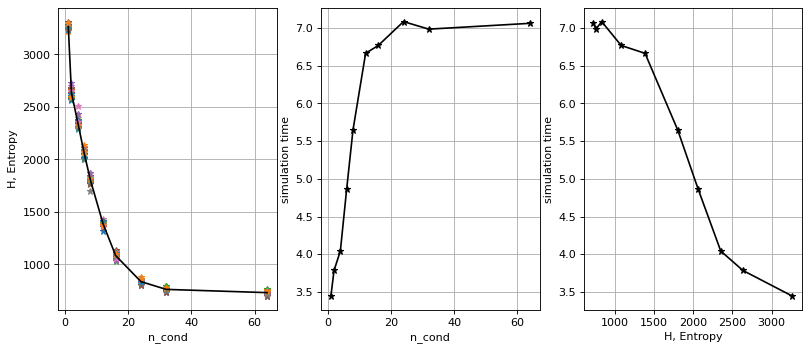

In [5]:
plt.figure(figsize=(12, 5), dpi=80)

ax1 = plt.subplot(1, 3, 1)
plt.plot(n_cond_arr,SI,'*')
plt.plot(n_cond_arr,H,'k-')
plt.grid()
plt.xlabel('n_cond')
plt.ylabel('H, Entropy')

ax2 = plt.subplot(1, 3, 2)
plt.plot(n_cond_arr,t,'k-*')
plt.grid()
plt.xlabel('n_cond')
plt.ylabel('simulation time')

ax3 = plt.subplot(1, 3, 3)
plt.plot(H,t,'k-*')
plt.grid()
plt.xlabel('H, Entropy')
plt.ylabel('simulation time')
